# Import Libraries

In [1]:
import numpy as np
import pandas as pd

# Load Data

In [2]:
train_data = pd.read_csv('fashion-mnist_train.csv')
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test_data = pd.read_csv('fashion-mnist_test.csv')
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data selection and Modelling

In [8]:
X_train = train_data.iloc[:, 1:].values
Y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values
Y_test = test_data.iloc[:, 0].values

In [9]:
from sklearn import preprocessing
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

# Modelling
We train our model for different no of estimators and compare

In [10]:
acc_list = list()
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
for n in range(1, 11):
    RFC = RandomForestClassifier(n_estimators=n)
    RFC.fit(X_train,Y_train)
    pred = RFC.predict(X_test)
    acc = metrics.accuracy_score(Y_test, pred)
    acc_list.append(acc)
    print("Random Forest Classifier's Accuracy for n =  " + str(n) + ' is: ', acc)

Random Forest Classifier's Accuracy for n =  1 is:  0.7442
Random Forest Classifier's Accuracy for n =  2 is:  0.7641
Random Forest Classifier's Accuracy for n =  3 is:  0.7535
Random Forest Classifier's Accuracy for n =  4 is:  0.8268
Random Forest Classifier's Accuracy for n =  5 is:  0.8441
Random Forest Classifier's Accuracy for n =  6 is:  0.839
Random Forest Classifier's Accuracy for n =  7 is:  0.8486
Random Forest Classifier's Accuracy for n =  8 is:  0.8541
Random Forest Classifier's Accuracy for n =  9 is:  0.8591
Random Forest Classifier's Accuracy for n =  10 is:  0.8606


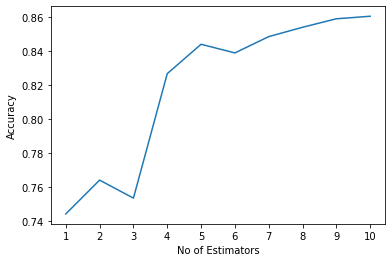

In [12]:
import matplotlib.pyplot as plt
axes = plt.axes()
axes.set_xticks(range(11))
plt.plot(range(1,11), acc_list)
plt.xlabel('No of Estimators')
plt.ylabel('Accuracy')
plt.show()

From the above graph, we take no of estimators as 8 for our model to optimize computational time and avoiding overfit

Final Model and Evaluation

In [14]:
RFC = RandomForestClassifier(n_estimators=8)
RFC.fit(X_train,Y_train)
pred = RFC.predict(X_test)
metrics.accuracy_score(Y_test, pred)

0.8531

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
# Confusion Matrix
cfm = pd.DataFrame(confusion_matrix(Y_test, pred))
cfm.columns= range(10)
cfm.index = range(10)
cfm

,0,1,2,3,4,5,6,7,8,9
0,836,4,15,49,4,0,84,0,8,0
1,6,959,3,23,1,1,7,0,0,0
2,15,3,786,9,117,0,66,0,4,0
3,32,10,9,909,27,0,12,0,1,0
4,7,1,124,35,785,0,45,0,3,0
5,0,0,0,2,1,937,0,43,6,11
6,229,2,121,30,84,1,521,0,12,0
7,0,0,0,0,0,35,0,910,0,55
8,4,1,9,1,5,2,12,3,962,1
9,0,0,0,0,0,8,0,61,5,926


In [17]:
print (classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79      1000
           1       0.98      0.96      0.97      1000
           2       0.74      0.79      0.76      1000
           3       0.86      0.91      0.88      1000
           4       0.77      0.79      0.78      1000
           5       0.95      0.94      0.94      1000
           6       0.70      0.52      0.60      1000
           7       0.89      0.91      0.90      1000
           8       0.96      0.96      0.96      1000
           9       0.93      0.93      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

